In [1]:
import pandas as pd
import numpy as np
import math

predictive_train=pd.read_parquet('predictive_train.gzip') 
predictive_test=pd.read_parquet('predictive_test.gzip') 

cluster_treino=pd.read_csv('cluster_treino1.csv')
cluster_teste=pd.read_csv('cluster_teste1.csv')

predictive_train=predictive_train.merge(cluster_treino)
predictive_test=predictive_test.merge(cluster_teste)

In [3]:
import sys
sys.path.insert(1, '../Functions')
from check_missing import check_missing
from cramersv import *
from pearson import *
from encode import *
from Treat_Missing import *

In [4]:
predictive_train.type_card.value_counts()

classic    3
Name: type_card, dtype: int64

In [5]:
predictive_train.drop(['issued_date','type_disp','type_card','name','unemploymant_rate_96', 'ratio_crimes_96'],axis=1,inplace=True)
predictive_test.drop(['issued_date','type_disp','type_card','name','unemploymant_rate_95', 'ratio_crimes_95'],axis=1,inplace=True)

In [6]:
predictive_train.columns

Index(['client_id', 'disp_id', 'account_id', 'district_id_cli',
       'district_id_ac', 'ac_date', 'birth_date', 'loan_date', 'sex',
       'frequency', 'amount', 'duration', 'payments', 'card', 'loan',
       'nb_prod', 'status', 'region', 'no_inhabitants', 'no_cities',
       'ratio_urban_inhabitants', 'average_salary', 'unemploymant_rate_95',
       'no_enterpreneurs_per_1000_inhabitants', 'dif_district', 'rend_sum',
       'max_date', 'meses_trans', 'avg_wage_trans', 'fout_sum',
       'avg_fout_trans', 'balance_sum', 'avg_balance', 'avg_nr_ntrans',
       'avg_amt_ntrans', 'avg_nr_ptrans', 'avg_amt_ptrans', 'avg_ins',
       'avg_interest', 'avg_pension', 'avg_house', 'avg_ncard', 'bank_fee',
       'Age', 'loan_end', 'ac_maturity', 'Nb_muni', 'ratio_mun_499',
       'ratio_mun_500_1999', 'ratio_mun_2000_9999', 'ratio_mun_10000',
       'ratio_crimes_95', 'risk_trans', 'nr_rtrans', 'trans_date_max',
       'district_new', '2tit', 'cluster'],
      dtype='object')

## Missings

In [7]:
check_missing(predictive_train)

The dataframe has 58 columns.
 There are 12 columns that have missing values.
 There are 46 columns that have no missing values.
 
 Here is the list of variable having missing values: 
['rend_sum', 'avg_wage_trans', 'fout_sum', 'avg_fout_trans', 'avg_nr_ntrans', 'avg_amt_ntrans', 'avg_ins', 'avg_interest', 'avg_pension', 'avg_house', 'avg_ncard', 'nr_rtrans']


,# Missing Values,% Missing Values
avg_pension,211,100.0
avg_ncard,209,99.1
nr_rtrans,201,95.3
avg_ins,184,87.2
rend_sum,148,70.1
avg_wage_trans,148,70.1
avg_house,80,37.9
fout_sum,18,8.5
avg_fout_trans,18,8.5
avg_nr_ntrans,2,0.9


In [8]:
check_missing(predictive_test)

The dataframe has 58 columns.
 There are 9 columns that have missing values.
 There are 49 columns that have no missing values.
 
 Here is the list of variable having missing values: 
['rend_sum', 'avg_wage_trans', 'fout_sum', 'avg_fout_trans', 'avg_ins', 'avg_pension', 'avg_house', 'avg_ncard', 'nr_rtrans']


,# Missing Values,% Missing Values
avg_pension,117,100.0
avg_ncard,112,95.7
nr_rtrans,112,95.7
avg_ins,101,86.3
rend_sum,83,70.9
avg_wage_trans,83,70.9
avg_house,49,41.9
fout_sum,15,12.8
avg_fout_trans,15,12.8


In [9]:
num_0=['rend_sum', 'avg_wage_trans', 'fout_sum', 'avg_fout_trans', 'avg_ins', 'avg_pension', 
       'avg_house', 'avg_ncard', 'nr_rtrans','avg_nr_ntrans', 'avg_amt_ntrans', 'avg_interest']
Treat_Missing(df=predictive_train,var=[num_0],values=[0])
Treat_Missing(df=predictive_test,var=[num_0],values=[0])

'Finished.'

In [10]:
check_missing(predictive_train)

The dataframe has 58 columns.
 There are 0 columns that have missing values.
 There are 58 columns that have no missing values.
 
 Here is the list of variable having missing values: 
[]


,# Missing Values,% Missing Values


In [11]:
predictive_train_raw=predictive_train.copy()
predictive_test_raw=predictive_test.copy()

In [12]:
train_cat=predictive_train.select_dtypes(include=['object'])

In [13]:
train_cat.describe()

,sex,frequency,region,district_new
count,211,211,211,211
unique,2,3,8,8
top,M,monthly issuance,south Moravia,Other
freq,107,169,43,152


../Functions\encode.py:33: UserWarning: Attempting to set identical bottom == top == 0.5 results in singular transformations; automatically expanding.
  ax.set_ylim(bottom + 0.5, top - 0.5)


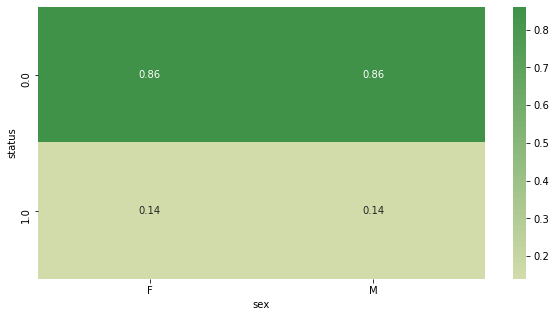

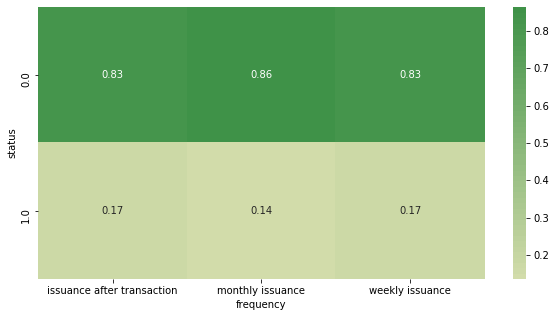

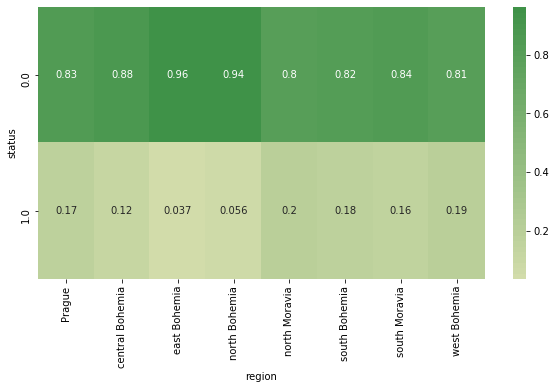

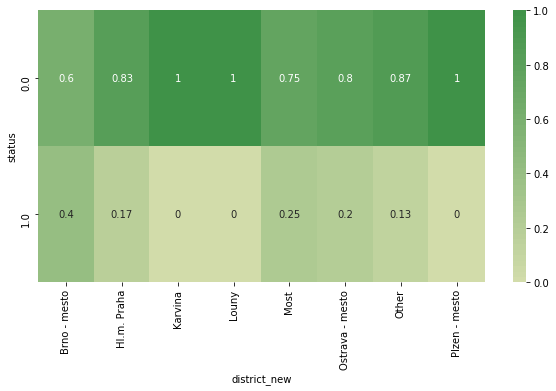

[{'M': 0, 'F': 1},
 {'monthly issuance': 0,
  'issuance after transaction': 1,
  'weekly issuance': 2},
 {'east Bohemia': 0,
  'north Bohemia': 1,
  'central Bohemia': 2,
  'south Moravia': 3,
  'Prague': 4,
  'south Bohemia': 5,
  'west Bohemia': 6,
  'north Moravia': 7},
 {'Karvina': 0,
  'Louny': 1,
  'Plzen - mesto': 2,
  'Other': 3,
  'Hl.m. Praha': 4,
  'Ostrava - mesto': 5,
  'Most': 6,
  'Brno - mesto': 7}]

In [14]:
encode(df=predictive_train, cat_var_labels=train_cat.columns, target_var='status', target_label=1)

In [15]:
predictive_train[train_cat.columns].dtypes

sex             int64
frequency       int64
region          int64
district_new    int64
dtype: object

## RFE (recursive feature elimination)

In [16]:
predictive_train.shape

(211, 58)

In [17]:
#pd.get_dummies(predictive_train[['sex', 'frequency', 'region', 'district_new']].astype('object'))

#### sem variável do cluster

In [18]:
x_train=predictive_train[['amount', 'duration', 'payments', 'card', 'loan', 'nb_prod', 
       'no_inhabitants', 'no_cities', 'ratio_urban_inhabitants',
       'average_salary', 'unemploymant_rate_95', 
       'no_enterpreneurs_per_1000_inhabitants', 'dif_district', 'rend_sum',
       'meses_trans', 'avg_wage_trans', 'fout_sum', 'avg_fout_trans',
       'balance_sum', 'avg_balance', 'avg_nr_ntrans', 'avg_amt_ntrans',
       'avg_nr_ptrans', 'avg_amt_ptrans', 'avg_ins', 'avg_interest',
       'avg_pension', 'avg_house', 'avg_ncard', 'bank_fee', 'Age',
       'ac_maturity', 'Nb_muni', 'ratio_mun_499', 'ratio_mun_500_1999',
       'ratio_mun_2000_9999', 'ratio_mun_10000', 'ratio_crimes_95',
       'risk_trans', 'nr_rtrans',
                    'sex', 'frequency', 'region', 'district_new']]

y_train=predictive_train['status']

9
[ 1 25  1 36 35 34 20 23 24 16 21 17 33 19  6 12  4  1  1  1  8  3  1  1
 28  2 29 13 30 27  7 18 14 15 10 11 26  5  1  1 31 32  9 22]


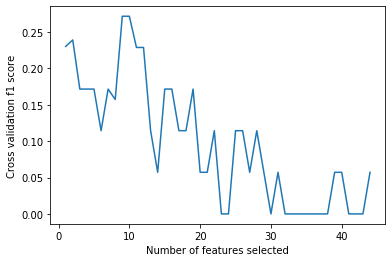

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline


"""
If you use Jupyter Notebook, you can use :
%matplotlib notebook      instead of %matplotlib inline
"""
rf_clf = RandomForestClassifier(bootstrap=True, 
                          class_weight=None, 
                          criterion='gini',
                          max_depth=3, 
                          max_features='auto', 
                          max_leaf_nodes=None,
                          min_impurity_decrease=0.0, 
                          min_impurity_split=None,
                          min_samples_leaf=5,
                          min_weight_fraction_leaf=0.0, 
                          n_estimators=100, 
                          n_jobs=16,
                          oob_score=False, 
                          random_state=893717398, 
                          warm_start=False)


rfecv = RFECV(estimator=rf_clf, 
              step=1, 
              cv=5, 
              scoring='f1', 
              n_jobs=16)


rfe = rfecv.fit(x_train, y_train)
print(rfe.n_features_) #Display the optimal number of variable
#print(rfe.support_)
print(rfe.ranking_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation f1 score")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [20]:
# See the detail of the values of plot to decide on value of n_features_to_select
res = list(zip (range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_))
#print(res)
nb_features = 9
rfe_sel= RFE(estimator=rf_clf,step=1,n_features_to_select=nb_features) 
rfe_sel_fit = rfe_sel.fit(x_train, y_train)

#print(rfe_sel_fit.support_)
#print(rfe_sel_fit.ranking_)

x_train_var = x_train[x_train.columns[rfe_sel_fit.get_support(indices=True)]]

# Display the columns names
x_train_var.columns

Index(['amount', 'payments', 'avg_fout_trans', 'balance_sum', 'avg_balance',
       'avg_nr_ptrans', 'avg_amt_ptrans', 'risk_trans', 'nr_rtrans'],
      dtype='object')

#### com variável do cluster

In [21]:
x_train=predictive_train[['amount', 'duration', 'payments', 'card', 'loan', 'nb_prod', 
       'no_inhabitants', 'no_cities', 'ratio_urban_inhabitants',
       'average_salary', 'unemploymant_rate_95', 
       'no_enterpreneurs_per_1000_inhabitants', 'dif_district', 'rend_sum',
       'meses_trans', 'avg_wage_trans', 'fout_sum', 'avg_fout_trans',
       'balance_sum', 'avg_balance', 'avg_nr_ntrans', 'avg_amt_ntrans',
       'avg_nr_ptrans', 'avg_amt_ptrans', 'avg_ins', 'avg_interest',
       'avg_pension', 'avg_house', 'avg_ncard', 'bank_fee', 'Age',
       'ac_maturity', 'Nb_muni', 'ratio_mun_499', 'ratio_mun_500_1999',
       'ratio_mun_2000_9999', 'ratio_mun_10000', 'ratio_crimes_95',
       'risk_trans', 'nr_rtrans',
                    'sex', 'frequency', 'region', 'district_new','cluster']]

y_train=predictive_train['status']

10
[ 1 35  1 34 31 30 13 22 28 17 18 19 25 24  5 11  3  7  1  1  8  1  1  1
 32  2 29 12 33 26 10 23  6 15  9 16 21  4  1  1 27 36 14 20  1]


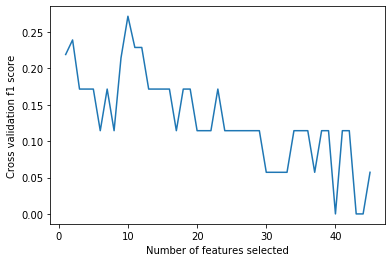

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline


"""
If you use Jupyter Notebook, you can use :
%matplotlib notebook      instead of %matplotlib inline
"""
rf_clf = RandomForestClassifier(bootstrap=True, 
                          class_weight=None, 
                          criterion='gini',
                          max_depth=3, 
                          max_features='auto', 
                          max_leaf_nodes=None,
                          min_impurity_decrease=0.0, 
                          min_impurity_split=None,
                          min_samples_leaf=5,
                          min_weight_fraction_leaf=0.0, 
                          n_estimators=100, 
                          n_jobs=16,
                          oob_score=False, 
                          random_state=893717398, 
                          warm_start=False)


rfecv = RFECV(estimator=rf_clf, 
              step=1, 
              cv=5, 
              scoring='f1', 
              n_jobs=16)


rfe = rfecv.fit(x_train, y_train)
print(rfe.n_features_) #Display the optimal number of variable
#print(rfe.support_)
print(rfe.ranking_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation f1 score")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [77]:
# See the detail of the values of plot to decide on value of n_features_to_select
res = list(zip (range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_))
#print(res)
nb_features = 10
rfe_sel= RFE(estimator=rf_clf,step=1,n_features_to_select=nb_features) 
rfe_sel_fit = rfe_sel.fit(x_train, y_train)

#print(rfe_sel_fit.support_)
#print(rfe_sel_fit.ranking_)

x_train_var = x_train[x_train.columns[rfe_sel_fit.get_support(indices=True)]]

# Display the columns names
x_train_var.columns

Index(['amount', 'payments', 'balance_sum', 'avg_balance', 'avg_nr_ptrans',
       'avg_amt_ptrans', 'avg_interest', 'risk_trans', 'nr_rtrans', 'cluster'],
      dtype='object')

## Correlações

In [78]:
train_num=predictive_train._get_numeric_data()

#remover as chaves das tabelas
train_num.drop(train_num.columns[train_num.columns.str.contains('_id', na=False)],axis=1,inplace=True)

In [79]:
see_cor=x_train_var.columns

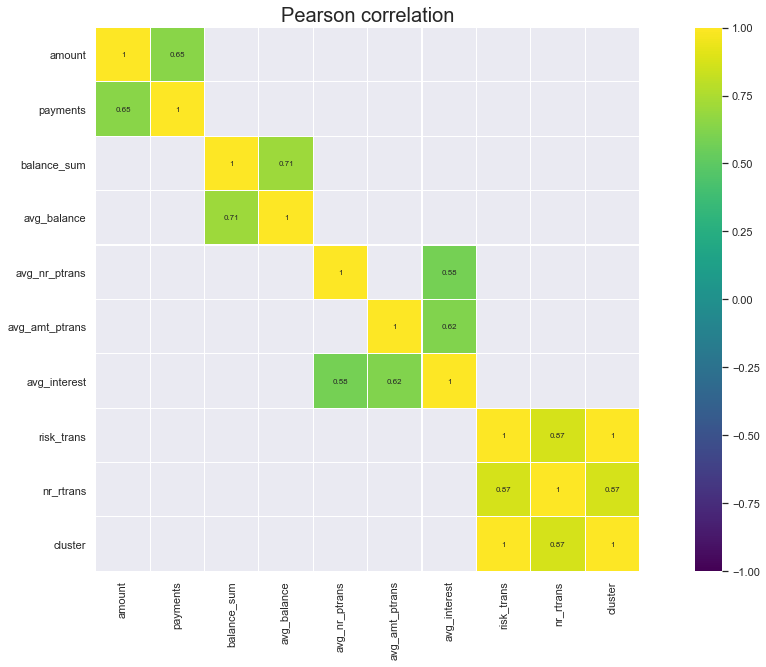

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

corr = train_num[see_cor].corr()
plt.figure(figsize=(20, 10))
plt.title('Pearson correlation', fontsize=20)

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

plt.savefig('correlacao.png')

## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
parameters = {'max_depth':[1,2,3,4,5], 'ccp_alpha':[0,0.001,0.01],'min_samples_leaf':range(5,20),
             'criterion':('gini', 'entropy')}
clf = GridSearchCV(dt, parameters,cv=5)
clf.fit(predictive_train[x_train_var.columns],predictive_train['status'])

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0, 0.001, 0.01],
                         'criterion': ('gini', 'entropy'),
            

In [82]:
clf.best_params_

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 5}

In [83]:
dt=DecisionTreeClassifier(random_state=0,ccp_alpha= 0, criterion= 'entropy', max_depth= 1, min_samples_leaf= 5)
dt.fit(predictive_train[x_train_var.columns],predictive_train['status'])

DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [84]:
from sklearn.tree import plot_tree, export_text

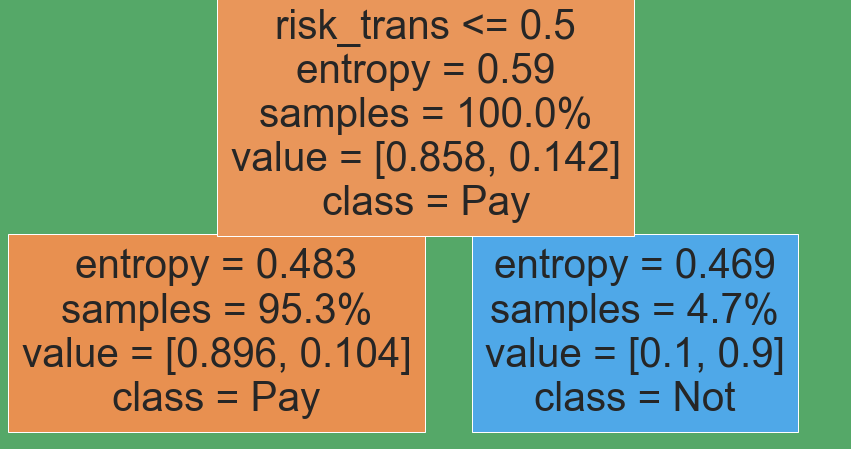

In [85]:
fig, ax = plt.subplots(figsize=(15, 8), facecolor='g')
plot_tree(dt,feature_names=x_train_var.columns, class_names=['Pay','Not'], filled=True, proportion=True, ax=ax);
plt.show()

In [86]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt,predictive_train[x_train_var.columns],predictive_train['status'],cv=5,scoring='accuracy').mean()

0.8768549280177187

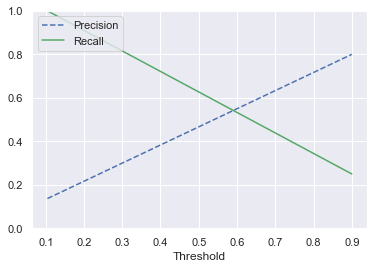

In [87]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

dt_prob = dt.predict_proba(predictive_test[x_train_var.columns])
# retrieve just the probabilities for the positive class
dt_prob1 = dt_prob[:, 1]

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

p, r, thresholds = precision_recall_curve(predictive_test['status'], dt_prob1)
plot_precision_recall_vs_threshold(p,r,thresholds)

In [88]:
dt_pred=dt.predict(predictive_test[x_train_var.columns])

from sklearn.metrics import confusion_matrix
confusion_matrix(predictive_test['status'], (dt.predict_proba(predictive_test[x_train_var.columns]) >= 0.8)[:, 1].astype(int))

array([[100,   1],
       [ 12,   4]], dtype=int64)

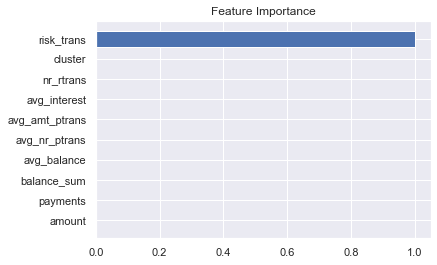

In [89]:
importances_dt = dt.feature_importances_

indices = np.argsort(importances_dt)
names = [x_train_var.columns[i] for i in indices]


plt.figure()
plt.title("Feature Importance")
plt.barh(range(len(x_train_var.columns)), importances_dt[indices])
plt.yticks(range(len(x_train_var.columns)), names, rotation=0)
plt.show()

## Random Forest

In [93]:
rf_clf = RandomForestClassifier(bootstrap=True, 
                          class_weight=None, 
                          max_features='auto', 
                          max_leaf_nodes=None,
                          min_impurity_decrease=0.0, 
                          min_impurity_split=None,
                          min_samples_leaf=5,
                          min_weight_fraction_leaf=0.0, 
                          n_jobs=16,
                          oob_score=False, 
                          random_state=0, 
                          warm_start=False)


parameters = {'n_estimators':range(20,201,20), 'max_depth':[1,2,3,4,5,6],
             'criterion':('gini', 'entropy')}
clf = GridSearchCV(rf_clf, parameters,cv=5)
clf.fit(predictive_train[x_train_var.columns],predictive_train['status'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=16,
                                              oob_score=False, random_state=0,
                                     

In [94]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 120}

In [95]:
rf= RandomForestClassifier(bootstrap=True, 
                          class_weight=None, 
                          max_features='auto', 
                          max_leaf_nodes=None,
                          min_impurity_decrease=0.0, 
                          min_impurity_split=None,
                          min_samples_leaf=5,
                          min_weight_fraction_leaf=0.0, 
                          n_jobs=16,
                          oob_score=False, 
                          random_state=0, 
                          warm_start=False,
                            criterion='gini', 
                            max_depth=5,
                            n_estimators=120)

In [96]:
rf.fit(predictive_train[x_train_var.columns],predictive_train['status'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=16, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [97]:
cross_val_score(rf,predictive_train[x_train_var.columns],predictive_train['status'],cv=5,scoring='accuracy').mean()

0.891029900332226

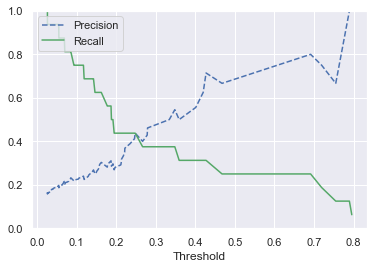

In [98]:
rf_prob = rf.predict_proba(predictive_test[x_train_var.columns])
# retrieve just the probabilities for the positive class
rf_prob1 = rf_prob[:, 1]

p, r, thresholds = precision_recall_curve(predictive_test['status'], rf_prob1)
plot_precision_recall_vs_threshold(p,r,thresholds)

In [99]:
rf_pred=rf.predict(predictive_test[x_train_var.columns])

confusion_matrix(predictive_test['status'], (rf.predict_proba(predictive_test[x_train_var.columns]) >= 0.69)[:, 1].astype(int))

array([[100,   1],
       [ 12,   4]], dtype=int64)

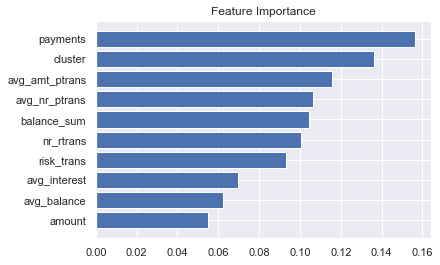

In [100]:
importances_rf = rf.feature_importances_

indices = np.argsort(importances_rf)
names = [x_train_var.columns[i] for i in indices]


plt.figure()
plt.title("Feature Importance")
plt.barh(range(len(x_train_var.columns)), importances_rf[indices])
plt.yticks(range(len(x_train_var.columns)), names, rotation=0)
plt.show()

## Regressão Logística

In [102]:
#Tratar correlações (mantenho a variável com + importância nos outros modelos)
x_train_var.columns

Index(['amount', 'payments', 'balance_sum', 'avg_balance', 'avg_nr_ptrans',
       'avg_amt_ptrans', 'avg_interest', 'risk_trans', 'nr_rtrans', 'cluster'],
      dtype='object')

In [103]:
xtrain_rlog=predictive_train[['payments', 'avg_fout_trans', 'balance_sum', 
       'avg_nr_ptrans', 'avg_amt_ptrans', 'risk_trans']]
xtest_rlog=predictive_test[['payments', 'avg_fout_trans', 'balance_sum', 
       'avg_nr_ptrans', 'avg_amt_ptrans', 'risk_trans']]

In [166]:
from sklearn.linear_model import LogisticRegression
rlog = LogisticRegression(random_state=0)

parameters = {'C':[0.3,0.6,0.9,1,2],
             'solver':('liblinear', 'lbfgs', 'newton-cg')}
clf = GridSearchCV(rlog, parameters,cv=5,scoring='f1')
clf.fit(xtrain_rlog,predictive_train['status'])
clf.best_params_

{'C': 0.9, 'solver': 'newton-cg'}

In [153]:
rlog = LogisticRegression(random_state=0,C=0.9,solver='newton-cg')
rlog.fit(xtrain_rlog,predictive_train['status'])

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
cross_val_score(rlog,xtrain_rlog,predictive_train['status'],cv=5,scoring='accuracy').mean()

0.8909191583610188

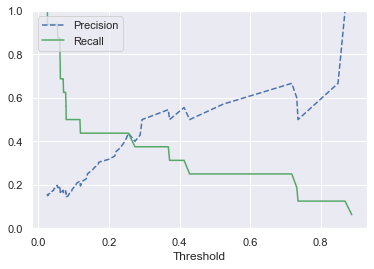

In [155]:
rlog_prob = rlog.predict_proba(xtest_rlog)
# retrieve just the probabilities for the positive class
rlog_prob1 = rlog_prob[:, 1]

p, r, thresholds = precision_recall_curve(predictive_test['status'], rlog_prob1)
plot_precision_recall_vs_threshold(p,r,thresholds)

In [157]:
rlog_pred=rlog.predict(xtest_rlog)

confusion_matrix(predictive_test['status'], (rlog.predict_proba(xtest_rlog) >= 0.69)[:, 1].astype(int))

array([[99,  2],
       [12,  4]], dtype=int64)

In [158]:
xtest_rlog.columns

Index(['payments', 'avg_fout_trans', 'balance_sum', 'avg_nr_ptrans',
       'avg_amt_ptrans', 'risk_trans'],
      dtype='object')

In [159]:
rlog.coef_ 

array([[ 3.74992464e-04, -1.76629891e-04, -3.59686601e-05,
         5.30046082e-01, -5.64946658e-08,  2.22717050e+00]])

In [160]:
rlog.intercept_

array([-3.25897991])

## CatBoost

### CatBoost (com feature importance)

In [111]:
from catboost import CatBoostClassifier, Pool, cv
train_data2=predictive_train[x_train_var.columns]
train_labels2=predictive_train['status']
cat_features2=[]
cat_index2=[]
test_data2=predictive_test[x_train_var.columns]
test_labels2=predictive_test['status']

In [112]:
model = CatBoostClassifier(eval_metric='Logloss', random_seed=0)
grid = {'learning_rate': [0.01, 0.03, 0.06, 0.1,0.15,0.2],
        'depth': [1,2,3,4,5],
       'n_estimators':range(20,201,20)}
model.grid_search(grid,X=train_data2,y=train_labels2,cv=5);

0:	loss: 0.5646849	best: 0.5646849 (0)	total: 24.2ms	remaining: 7.22s
1:	loss: 0.4356626	best: 0.4356626 (1)	total: 33.7ms	remaining: 5.02s
2:	loss: 0.3591715	best: 0.3591715 (2)	total: 42.7ms	remaining: 4.23s
3:	loss: 0.3169577	best: 0.3169577 (3)	total: 54.8ms	remaining: 4.05s
4:	loss: 0.2963842	best: 0.2963842 (4)	total: 64.2ms	remaining: 3.79s
5:	loss: 0.2870413	best: 0.2870413 (5)	total: 72.5ms	remaining: 3.55s
6:	loss: 0.4875306	best: 0.2870413 (5)	total: 92.6ms	remaining: 3.88s
7:	loss: 0.3637394	best: 0.2870413 (5)	total: 108ms	remaining: 3.96s
8:	loss: 0.3064710	best: 0.2870413 (5)	total: 125ms	remaining: 4.05s
9:	loss: 0.2812431	best: 0.2812431 (9)	total: 152ms	remaining: 4.41s
10:	loss: 0.2655986	best: 0.2655986 (10)	total: 169ms	remaining: 4.45s
11:	loss: 0.2500285	best: 0.2500285 (11)	total: 189ms	remaining: 4.54s
12:	loss: 0.4374037	best: 0.2500285 (11)	total: 213ms	remaining: 4.69s
13:	loss: 0.3335183	best: 0.2500285 (11)	total: 236ms	remaining: 4.81s
14:	loss: 0.2845654

In [113]:
model.get_params()

{'random_seed': 0,
 'eval_metric': 'Logloss',
 'depth': 5,
 'iterations': 20,
 'learning_rate': 0.2}

In [114]:
catb2 = CatBoostClassifier(eval_metric='Logloss', random_seed=0,n_estimators=20,learning_rate=0.2,depth=5)
catb2.fit(train_data2,train_labels2, plot=True, eval_set=(test_data2, test_labels2))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5889704	test: 0.5917332	best: 0.5917332 (0)	total: 1.57ms	remaining: 29.8ms
1:	learn: 0.5171991	test: 0.5225237	best: 0.5225237 (1)	total: 2.38ms	remaining: 21.4ms
2:	learn: 0.4641099	test: 0.4767157	best: 0.4767157 (2)	total: 3.54ms	remaining: 20.1ms
3:	learn: 0.4316236	test: 0.4473996	best: 0.4473996 (3)	total: 4.78ms	remaining: 19.1ms
4:	learn: 0.4095321	test: 0.4316783	best: 0.4316783 (4)	total: 5.96ms	remaining: 17.9ms
5:	learn: 0.3782303	test: 0.4103838	best: 0.4103838 (5)	total: 7.11ms	remaining: 16.6ms
6:	learn: 0.3529605	test: 0.3926321	best: 0.3926321 (6)	total: 8.22ms	remaining: 15.3ms
7:	learn: 0.3295330	test: 0.3775237	best: 0.3775237 (7)	total: 9.25ms	remaining: 13.9ms
8:	learn: 0.3147520	test: 0.3648970	best: 0.3648970 (8)	total: 10.4ms	remaining: 12.7ms
9:	learn: 0.3002265	test: 0.3593779	best: 0.3593779 (9)	total: 11.5ms	remaining: 11.5ms
10:	learn: 0.2866715	test: 0.3515511	best: 0.3515511 (10)	total: 12.6ms	remaining: 10.3ms
11:	learn: 0.2746566	test: 0.3

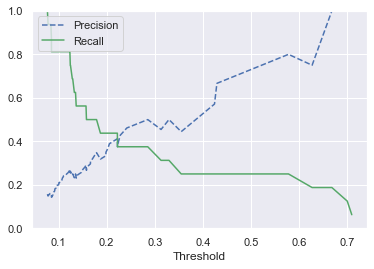

In [115]:
cb_prob2 = catb2.predict_proba(test_data2)
# retrieve just the probabilities for the positive class
cb_prob21 = cb_prob2[:, 1]

p, r, thresholds = precision_recall_curve(predictive_test['status'], cb_prob21)
plot_precision_recall_vs_threshold(p,r,thresholds)

In [117]:
cb_pred2=catb2.predict(test_data2)

confusion_matrix(test_labels2, (cb_prob2 >= 0.57)[:, 1].astype(int))

array([[100,   1],
       [ 12,   4]], dtype=int64)

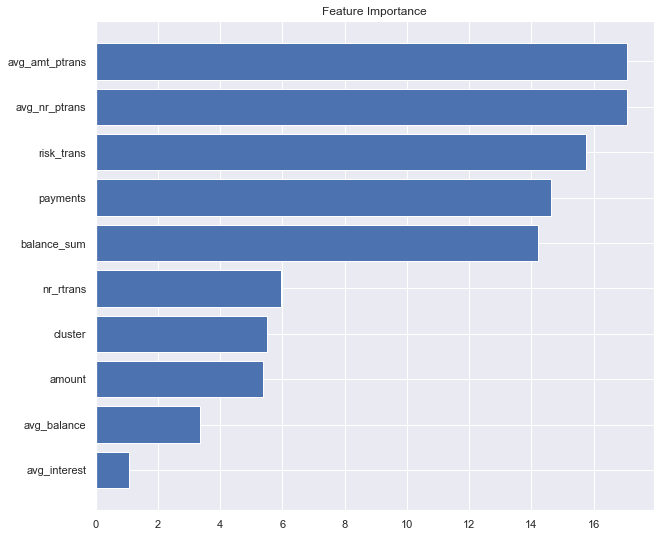

In [173]:
importances_cb = catb2.feature_importances_

indices = np.argsort(importances_cb)
names = [test_data2.columns[i] for i in indices]


plt.figure(figsize=(10, 9))
plt.title("Feature Importance")
plt.barh(range(len(test_data2.columns)), importances_cb[indices])
plt.yticks(range(len(test_data2.columns)), names, rotation=0)
plt.savefig('cat1.png')
plt.show()

### SVM

In [130]:
from sklearn.svm import SVC

In [167]:
svm_clf = SVC(random_state=0)

parameters = {'C':[0.9,1,2,0.5],
             'kernel':('linear', 'rbf', 'sigmoid')}
clf = GridSearchCV(svm_clf, parameters,cv=5)
clf.fit(predictive_train[x_train_var.columns],predictive_train['status'])

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.9, 1, 2, 0.5],
                         'kernel': ('linear', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [138]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [143]:
svm= SVC(random_state=0,probability=True,C=1,kernel='rbf')

In [144]:
svm.fit(predictive_train[x_train_var.columns],predictive_train['status'])

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [145]:
cross_val_score(svm,predictive_train[x_train_var.columns],predictive_train['status'],cv=5,scoring='accuracy').mean()

0.8578073089700997

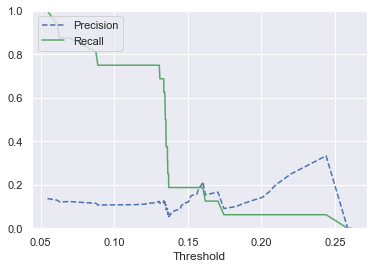

In [146]:
svm_prob = svm.predict_proba(predictive_test[x_train_var.columns])
# retrieve just the probabilities for the positive class
svm_prob1 = svm_prob[:, 1]

p, r, thresholds = precision_recall_curve(predictive_test['status'], svm_prob1)
plot_precision_recall_vs_threshold(p,r,thresholds)

In [149]:
svm_pred=svm.predict(predictive_test[x_train_var.columns])

confusion_matrix(predictive_test['status'], (svm.predict_proba(predictive_test[x_train_var.columns]) >= 0.24)[:, 1].astype(int))

array([[99,  2],
       [15,  1]], dtype=int64)

In [150]:
importances_svm = svm.feature_importances_

indices = np.argsort(importances_svm)
names = [x_train_var.columns[i] for i in indices]


plt.figure()
plt.title("Feature Importance")
plt.barh(range(len(x_train_var.columns)), importances_svm[indices])
plt.yticks(range(len(x_train_var.columns)), names, rotation=0)
plt.show()

AttributeError: 'SVC' object has no attribute 'feature_importances_'

## Comparação & Avaliação dos modelos no teste

In [119]:
from sklearn.dummy import DummyClassifier
bl_clf = DummyClassifier(strategy="most_frequent")
bl_clf.fit(predictive_train[x_train_var.columns],predictive_train['status'])

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [120]:
cross_val_score(bl_clf,predictive_train[x_train_var.columns],predictive_train['status'],cv=2,scoring='accuracy').mean()

0.8578167115902965

In [121]:
bl_pred=bl_clf.predict(predictive_test[x_train_var.columns])

In [122]:
bl_prob = bl_clf.predict_proba(predictive_test[x_train_var.columns])
# retrieve just the probabilities for the positive class
bl_prob1 = bl_prob[:, 1]

In [123]:
confusion_matrix(predictive_test['status'], bl_pred)

array([[101,   0],
       [ 16,   0]], dtype=int64)

In [124]:
predictive_test['status'].sum()/len(predictive_test['status'])

0.13675213675213677

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
Model=[' Baseline (bline)','Decision Tree (dt)','Random Forest (rf)','Logistic Regression (rlog)','CatBoost (catb)']

Accuracy_test=[round(accuracy_score(predictive_test['status'], (bl_prob1 >= 0.5).astype(int)),2),
               round(accuracy_score(predictive_test['status'], (dt_prob1 >= 0.8).astype(int)),2),
              round(accuracy_score(predictive_test['status'], (rf_prob1 >= 0.69).astype(int)),2),
              round(accuracy_score(predictive_test['status'], (rlog_prob1 >= 0.69).astype(int)),2),
              round(accuracy_score(predictive_test['status'], (cb_prob21 >= 0.57).astype(int)),2)]

Precision_test=[round(precision_score(predictive_test['status'], (bl_prob1 >= 0.5).astype(int)),2),
                round(precision_score(predictive_test['status'], (dt_prob1 >= 0.8).astype(int)),2),
              round(precision_score(predictive_test['status'], (rf_prob1 >= 0.69).astype(int)),2),
              round(precision_score(predictive_test['status'], (rlog_prob1 >= 0.69).astype(int)),2),
              round(precision_score(predictive_test['status'], (cb_prob21 >= 0.57).astype(int)),2)]

Recall_test=[round(recall_score(predictive_test['status'], (bl_prob1 >= 0.5).astype(int)),2),
            round(recall_score(predictive_test['status'], (dt_prob1 >= 0.8).astype(int)),2),
              round(recall_score(predictive_test['status'], (rf_prob1 >= 0.69).astype(int)),2),
              round(recall_score(predictive_test['status'], (rlog_prob1 >= 0.69).astype(int)),2),
              round(recall_score(predictive_test['status'], (cb_prob21 >= 0.57).astype(int)),2)]

F1_test=[round(f1_score(predictive_test['status'], (bl_prob1 >= 0.5).astype(int)),2),
         round(f1_score(predictive_test['status'], (dt_prob1 >= 0.8).astype(int)),2),
              round(f1_score(predictive_test['status'], (rf_prob1 >= 0.69).astype(int)),2),
              round(f1_score(predictive_test['status'], (rlog_prob1 >= 0.69).astype(int)),2),
              round(f1_score(predictive_test['status'], (cb_prob21 >= 0.57).astype(int)),2)]

In [162]:
metrics=pd.DataFrame({'Model':Model,'Accuracy_test':Accuracy_test,'Precision_test_class1':Precision_test,
                     'Recall_test_class1':Recall_test,'F1_test_class1':F1_test})

In [163]:
metrics

,Model,Accuracy_test,Precision_test_class1,Recall_test_class1,F1_test_class1
0,Baseline (bline),0.86,0.00,0.00,0.00
1,Decision Tree (dt),0.89,0.80,0.25,0.38
2,Random Forest (rf),0.89,0.80,0.25,0.38
3,Logistic Regression (rlog),0.88,0.67,0.25,0.36
4,CatBoost (catb),0.89,0.80,0.25,0.38


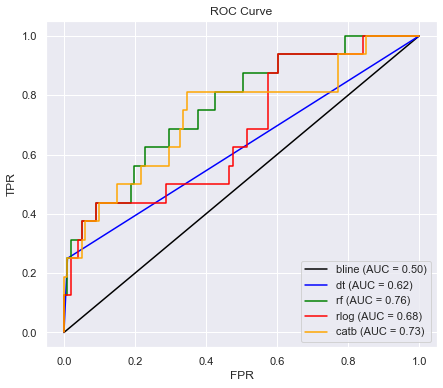

In [164]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(7, 6))

fpr, tpr, _ = roc_curve(predictive_test['status'], bl_prob1)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='black',
                 label='bline (AUC = %0.2f)' % auc_score)

fpr, tpr, _ = roc_curve(predictive_test['status'], dt_prob1)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue',
                 label='dt (AUC = %0.2f)' % auc_score)

fpr, tpr, _ = roc_curve(predictive_test['status'], rf_prob1)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green',
                 label='rf (AUC = %0.2f)' % auc_score)

fpr, tpr, _ = roc_curve(predictive_test['status'], rlog_prob1)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
                 label='rlog (AUC = %0.2f)' % auc_score)

fpr, tpr, _ = roc_curve(predictive_test['status'], cb_prob21)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='orange',
                 label='catb (AUC = %0.2f)' % auc_score)


plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [72]:
from pycaret.classification import *

In [73]:
clf1 = setup(data = predictive_train, 
             target = 'status',
             categorical_features = train_cat.columns, 
             ignore_features = ['client_id', 'disp_id', 'account_id', 'district_id_cli',
       'district_id_ac', 'ac_date', 'birth_date', 'loan_date', 'max_date', 'loan_end','trans_date_max'],
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4015
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(211, 58)"
4,Missing Values,False
5,Numeric Features,40
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [74]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.898000,0.777800,0.333300,0.916700,0.478100,0.435400
1,Gradient Boosting Classifier,0.884400,0.728500,0.333300,0.722200,0.454500,0.398700
2,CatBoost Classifier,0.884400,0.781200,0.190500,1.000000,0.314800,0.283700
3,Extra Trees Classifier,0.877600,0.736400,0.238100,0.777800,0.363000,0.312900
4,Random Forest Classifier,0.870700,0.725600,0.095200,0.333300,0.148100,0.135600
5,Light Gradient Boosting Machine,0.870700,0.748300,0.285700,0.688900,0.392600,0.331300
6,Decision Tree Classifier,0.857100,0.678600,0.428600,0.513900,0.459700,0.379700
7,Quadratic Discriminant Analysis,0.857100,0.500000,0.000000,0.000000,0.000000,0.000000
8,Ada Boost Classifier,0.857100,0.798200,0.428600,0.500000,0.454500,0.374400
9,Logistic Regression,0.850300,0.766400,0.285700,0.559500,0.351600,0.275700


In [75]:
tuned_cb = tune_model('catboost')
print(tuned_cb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8667,0.8462,0.0000,0.0000,0.0000,0.0000
1,0.9333,0.7308,0.5000,1.0000,0.6667,0.6341
2,0.8667,0.9231,0.0000,0.0000,0.0000,0.0000
3,0.8667,0.4615,0.0000,0.0000,0.0000,0.0000
4,0.8667,0.9615,0.0000,0.0000,0.0000,0.0000
5,0.8667,0.5769,0.0000,0.0000,0.0000,0.0000
6,0.8667,0.9444,0.3333,1.0000,0.5000,0.4444
7,0.8571,0.8750,0.0000,0.0000,0.0000,0.0000
8,0.9286,0.7083,0.5000,1.0000,0.6667,0.6316
9,0.9286,1.0000,0.5000,1.0000,0.6667,0.6316


In [76]:
tuned_dt = tune_model('dt')
print(tuned_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8667,0.6731,0.0,0.0,0.0,0.0000
1,0.8667,0.5577,0.0,0.0,0.0,0.0000
2,0.8667,0.5000,0.0,0.0,0.0,0.0000
3,0.8667,0.5000,0.0,0.0,0.0,0.0000
4,0.8000,0.4615,0.0,0.0,0.0,-0.0976
5,0.8667,0.4231,0.0,0.0,0.0,0.0000
6,0.8000,0.5417,0.0,0.0,0.0,0.0000
7,0.8571,0.5000,0.0,0.0,0.0,0.0000
8,0.8571,0.5000,0.0,0.0,0.0,0.0000
9,0.8571,0.5000,0.0,0.0,0.0,0.0000


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=38, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4015, splitter='best')
